##  Portfolio analysis for Securities of Indian stocks

In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [4]:
tickers = ['INFY.NS', 'TCS.NS', 'ICICIBANK.NS', 'HDFCBANK.NS', 'BAJAJFINSV.NS', 'HDFCAMC.NS', 'HDFCLIFE.NS', 'ESCORTS.NS', 'ULTRACEMCO.NS', 'BHARTIARTL.NS',
          'JUBLFOOD.NS', 'ASIANPAINT.NS', 'DRREDDY.BO', 'DMART.NS', 'HINDUNILVR.NS', 'HEG.NS', 'TITAN.NS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

In [33]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2770 entries, 2010-01-04 to 2021-03-26
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   INFY.NS        2770 non-null   float64
 1   TCS.NS         2770 non-null   float64
 2   ICICIBANK.NS   2770 non-null   float64
 3   HDFCBANK.NS    2770 non-null   float64
 4   BAJAJFINSV.NS  2770 non-null   float64
 5   HDFCAMC.NS     648 non-null    float64
 6   HDFCLIFE.NS    827 non-null    float64
 7   ESCORTS.NS     2770 non-null   float64
 8   ULTRACEMCO.NS  2770 non-null   float64
 9   BHARTIARTL.NS  2770 non-null   float64
 10  JUBLFOOD.NS    2746 non-null   float64
 11  ASIANPAINT.NS  2770 non-null   float64
 12  DRREDDY.BO     2770 non-null   float64
 13  DMART.NS       992 non-null    float64
 14  HINDUNILVR.NS  2770 non-null   float64
 15  HEG.NS         2770 non-null   float64
 16  TITAN.NS       2770 non-null   float64
dtypes: float64(17)
memory usage: 389.5

In [36]:
mydata.tail

<bound method NDFrame.tail of                 INFY.NS       TCS.NS  ICICIBANK.NS  HDFCBANK.NS  \
Date                                                              
2010-01-04   257.140747   302.451019    136.021439   158.248413   
2010-01-05   258.001984   302.531525    137.312576   158.387589   
2010-01-06   254.237213   295.690979    138.363998   158.494308   
2010-01-07   248.523773   287.462311    137.057449   158.907150   
2010-01-08   242.534668   281.587463    135.132385   159.115891   
...                 ...          ...           ...          ...   
2021-03-22  1370.800049  3129.649902    573.450012  1469.150024   
2021-03-23  1371.550049  3142.600098    586.400024  1500.150024   
2021-03-24  1353.750000  3121.100098    567.500000  1478.800049   
2021-03-25  1333.800049  3064.850098    571.549988  1463.349976   
2021-03-26  1336.199951  3066.800049    578.549988  1491.300049   

            BAJAJFINSV.NS   HDFCAMC.NS  HDFCLIFE.NS   ESCORTS.NS  \
Date                          

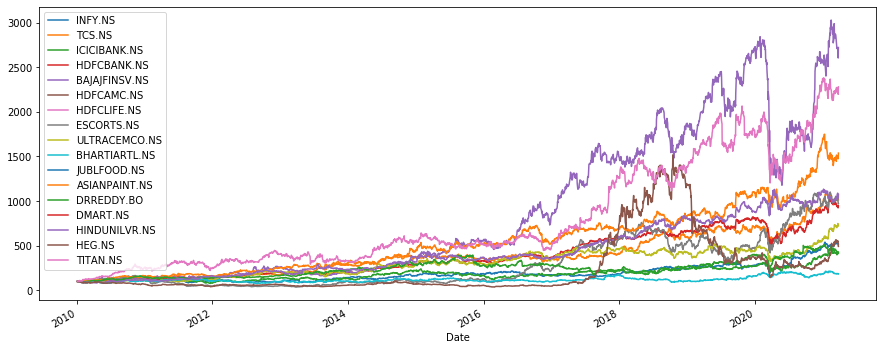

In [5]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

How would you interpret the behavior of the stocks? Just by looking at the chart, would you be able to create a portfolio that provides a solid return on investment?

*****

### Calculating the Return of a Portfolio of Securities

In [37]:
mydata_ret = mydata / mydata.iloc[0]
mydata_ret.head()

,INFY.NS,TCS.NS,ICICIBANK.NS,HDFCBANK.NS,BAJAJFINSV.NS,HDFCAMC.NS,HDFCLIFE.NS,ESCORTS.NS,ULTRACEMCO.NS,BHARTIARTL.NS,JUBLFOOD.NS,ASIANPAINT.NS,DRREDDY.BO,DMART.NS,HINDUNILVR.NS,HEG.NS,TITAN.NS
Date,,,,,,,,,,,,,,,,,
2010-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,NaN,1.000000,1.000000,1.000000
2010-01-05,1.003349,1.000266,1.009492,1.000879,1.002225,NaN,NaN,0.997930,1.020702,1.015836,NaN,1.003159,1.029110,NaN,0.996789,1.006649,1.020507
2010-01-06,0.988708,0.977649,1.017222,1.001554,0.978578,NaN,NaN,1.032436,1.021944,1.005074,NaN,1.000139,1.052975,NaN,1.002456,1.018923,1.036933
2010-01-07,0.966489,0.950443,1.007617,1.004163,0.970928,NaN,NaN,1.052795,1.012680,1.012915,NaN,0.989936,1.036147,NaN,1.000378,1.011635,1.062715
2010-01-08,0.943198,0.931018,0.993464,1.005482,0.973710,NaN,NaN,1.037957,1.025049,0.999539,NaN,1.006290,1.043271,NaN,1.004722,0.995525,1.052902


Obtain the simple return of the securities in the portfolio and store the results in a new table.

In [39]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,INFY.NS,TCS.NS,ICICIBANK.NS,HDFCBANK.NS,BAJAJFINSV.NS,HDFCAMC.NS,HDFCLIFE.NS,ESCORTS.NS,ULTRACEMCO.NS,BHARTIARTL.NS,JUBLFOOD.NS,ASIANPAINT.NS,DRREDDY.BO,DMART.NS,HINDUNILVR.NS,HEG.NS,TITAN.NS
Date,,,,,,,,,,,,,,,,,
2021-03-22,0.019599,0.026047,-0.022501,-0.018932,-0.003686,0.004023,-0.012492,0.014258,0.008393,-0.003680,0.003923,0.005993,0.018563,-0.027092,0.017798,-0.012019,-0.003514
2021-03-23,0.000547,0.004138,0.022583,0.021101,-0.000069,0.004805,0.005442,0.002312,0.031376,0.002367,0.018216,-0.006349,0.004146,0.018593,-0.006757,0.019266,0.024002
2021-03-24,-0.012978,-0.006841,-0.032231,-0.014232,-0.021600,-0.016434,-0.010314,-0.032517,-0.011594,-0.010581,-0.021728,0.013795,-0.004781,-0.026605,-0.008001,-0.034086,-0.004815
2021-03-25,-0.014737,-0.018022,0.007137,-0.010448,-0.015703,-0.014322,-0.014043,-0.041482,-0.028016,-0.030364,-0.015132,-0.016922,0.007412,-0.020871,-0.035172,-0.078665,-0.025065
2021-03-26,0.001799,0.000636,0.012247,0.019100,0.045255,0.016506,0.007046,0.003080,0.010313,0.029050,0.019879,0.042857,0.005019,0.021173,0.036141,-0.002387,0.037909


First, assume you would like to create an equally-weighted portfolio. Create the array, naming it “weights”.

In [8]:
weights = np.array([0.075,0.075,0.08,0.08,0.08,0.08,0.08,0.05,0.03,0.0375,0.0125,0.10,0.02,0.07,0.07,0.01,0.05])

In [9]:
annual_returns = returns.mean() * 252
annual_returns*100

INFY.NS          19.006291
TCS.NS           24.469280
ICICIBANK.NS     19.131099
HDFCBANK.NS      23.248209
BAJAJFINSV.NS    36.550401
HDFCAMC.NS       25.241844
HDFCLIFE.NS      26.755053
ESCORTS.NS       30.726411
ULTRACEMCO.NS    21.998429
BHARTIARTL.NS    11.037537
JUBLFOOD.NS      37.771254
ASIANPAINT.NS    28.254877
DRREDDY.BO       16.568628
DMART.NS         44.208292
HINDUNILVR.NS    24.541270
HEG.NS           25.782068
TITAN.NS         34.376020
dtype: float64

In [11]:
portfolio_return = np.dot(annual_returns, weights)
portfolio_return*100

26.763069234661657

In [53]:
port_ret = (returns * weights).sum(axis = 1)

port_ret=port_ret[0:2751]

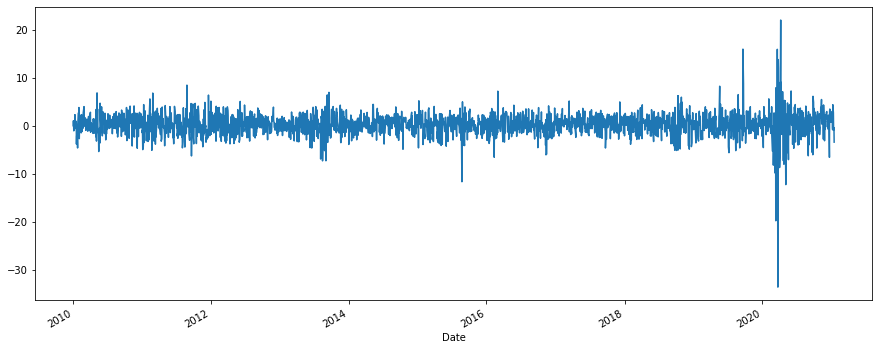

In [13]:
(port_ret*250).plot(figsize=(15,6))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

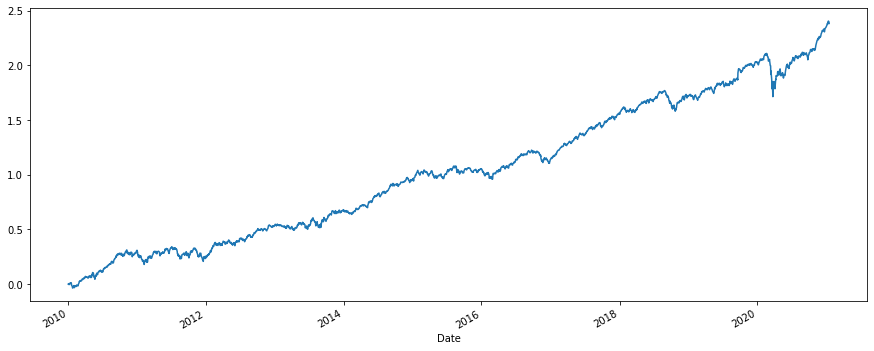

In [14]:
port_ret_cum= port_ret.cumsum()
port_ret_cum.plot(figsize=(15,6))
plt.show

Transform the result into a percentage form. 

In [15]:
pfolio_1 =('Annual return for the portfolio is ' + str(round(np.dot(annual_returns, weights), 5) * 100) + ' %' )
print (pfolio_1)

Annual return for the portfolio is 26.762999999999998 %


In [16]:
returns.std()

INFY.NS          0.017738
TCS.NS           0.016396
ICICIBANK.NS     0.021767
HDFCBANK.NS      0.014978
BAJAJFINSV.NS    0.022666
HDFCAMC.NS       0.022890
HDFCLIFE.NS      0.022063
ESCORTS.NS       0.028354
ULTRACEMCO.NS    0.017701
BHARTIARTL.NS    0.020773
JUBLFOOD.NS      0.026071
ASIANPAINT.NS    0.016366
DRREDDY.BO       0.016867
DMART.NS         0.022299
HINDUNILVR.NS    0.015379
HEG.NS           0.030201
TITAN.NS         0.021705
dtype: float64

In [17]:
cov_matrix= returns.cov()*250
cov_matrix

,INFY.NS,TCS.NS,ICICIBANK.NS,HDFCBANK.NS,BAJAJFINSV.NS,HDFCAMC.NS,HDFCLIFE.NS,ESCORTS.NS,ULTRACEMCO.NS,BHARTIARTL.NS,JUBLFOOD.NS,ASIANPAINT.NS,DRREDDY.BO,DMART.NS,HINDUNILVR.NS,HEG.NS,TITAN.NS
INFY.NS,0.078662,0.038223,0.022679,0.016505,0.014465,0.020966,0.031966,0.026420,0.013693,0.014590,0.018021,0.011076,0.012794,0.014901,0.011783,0.010640,0.014488
TCS.NS,0.038223,0.067206,0.019304,0.014998,0.014687,0.024890,0.022687,0.024564,0.013987,0.012173,0.018631,0.010319,0.010527,0.016177,0.011944,0.010482,0.014614
ICICIBANK.NS,0.022679,0.019304,0.118448,0.045517,0.045459,0.058592,0.053419,0.057995,0.040460,0.034467,0.042147,0.026699,0.016515,0.037578,0.017909,0.037564,0.039663
HDFCBANK.NS,0.016505,0.014998,0.045517,0.056086,0.030866,0.042206,0.043957,0.035602,0.024608,0.022153,0.023518,0.019795,0.009952,0.023988,0.014691,0.022153,0.026816
BAJAJFINSV.NS,0.014465,0.014687,0.045459,0.030866,0.128436,0.068263,0.054525,0.048975,0.032127,0.025031,0.031227,0.023801,0.012466,0.042216,0.014763,0.038672,0.032462
HDFCAMC.NS,0.020966,0.024890,0.058592,0.042206,0.068263,0.130987,0.053881,0.069593,0.045025,0.034397,0.049028,0.028158,0.017904,0.037336,0.026133,0.074768,0.042699
HDFCLIFE.NS,0.031966,0.022687,0.053419,0.043957,0.054525,0.053881,0.121693,0.059561,0.041966,0.038225,0.030348,0.033906,0.023040,0.026934,0.031578,0.038120,0.037282
ESCORTS.NS,0.026420,0.024564,0.057995,0.035602,0.048975,0.069593,0.059561,0.200981,0.039969,0.031566,0.050952,0.032398,0.020971,0.050870,0.022439,0.049843,0.040656
ULTRACEMCO.NS,0.013693,0.013987,0.040460,0.024608,0.032127,0.045025,0.041966,0.039969,0.078330,0.024935,0.030384,0.026536,0.013603,0.034648,0.015809,0.026743,0.024017
BHARTIARTL.NS,0.014590,0.012173,0.034467,0.022153,0.025031,0.034397,0.038225,0.031566,0.024935,0.107881,0.023459,0.018173,0.011562,0.025824,0.013437,0.018304,0.024685


In [18]:
corr_matrix=returns.corr()
corr_matrix

,INFY.NS,TCS.NS,ICICIBANK.NS,HDFCBANK.NS,BAJAJFINSV.NS,HDFCAMC.NS,HDFCLIFE.NS,ESCORTS.NS,ULTRACEMCO.NS,BHARTIARTL.NS,JUBLFOOD.NS,ASIANPAINT.NS,DRREDDY.BO,DMART.NS,HINDUNILVR.NS,HEG.NS,TITAN.NS
INFY.NS,1.000000,0.525692,0.234948,0.248489,0.143910,0.177620,0.300766,0.210119,0.174440,0.158381,0.155910,0.152605,0.171044,0.143550,0.172778,0.079444,0.150522
TCS.NS,0.525692,1.000000,0.216359,0.244284,0.158087,0.239793,0.234268,0.211358,0.192782,0.142965,0.174850,0.153820,0.152260,0.173378,0.189474,0.084670,0.164259
ICICIBANK.NS,0.234948,0.216359,1.000000,0.558445,0.368561,0.394689,0.394294,0.375882,0.420050,0.304910,0.297153,0.299782,0.179937,0.284238,0.214001,0.228569,0.335817
HDFCBANK.NS,0.248489,0.244284,0.558445,1.000000,0.363668,0.383458,0.452003,0.335324,0.371271,0.284800,0.241313,0.322994,0.157573,0.261444,0.255109,0.195892,0.329948
BAJAJFINSV.NS,0.143910,0.158087,0.368561,0.363668,1.000000,0.441454,0.394400,0.304825,0.320309,0.212649,0.211112,0.256644,0.130430,0.315749,0.169413,0.225977,0.263945
HDFCAMC.NS,0.177620,0.239793,0.394689,0.383458,0.441454,1.000000,0.419396,0.402927,0.370983,0.244551,0.336138,0.264888,0.165525,0.283809,0.267268,0.333866,0.345460
HDFCLIFE.NS,0.300766,0.234268,0.394294,0.452003,0.394400,0.419396,1.000000,0.380586,0.382655,0.294322,0.227178,0.353931,0.221471,0.221481,0.358006,0.176787,0.327396
ESCORTS.NS,0.210119,0.211358,0.375882,0.335324,0.304825,0.402927,0.380586,1.000000,0.318550,0.214371,0.275877,0.279260,0.175398,0.334339,0.205836,0.232831,0.264257
ULTRACEMCO.NS,0.174440,0.192782,0.420050,0.371271,0.320309,0.370983,0.382655,0.318550,1.000000,0.271252,0.263695,0.366386,0.182255,0.327578,0.232290,0.200109,0.250048
BHARTIARTL.NS,0.158381,0.142965,0.304910,0.284800,0.212649,0.244551,0.294322,0.214371,0.271252,1.000000,0.173069,0.213810,0.131998,0.203023,0.168246,0.116706,0.219000


In [19]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.0340939286218234

In [20]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.18464541321631414

In [21]:
print ('The volatility of the portfolio is ' + str(round(pfolio_vol, 6) * 100) + ' %')

The volatility of the portfolio is 18.4645 %


In [22]:
benchmark_price = wb.get_data_yahoo('^NSEI',
                               start = '2010-1-1')
benchmark_ret = benchmark_price["Adj Close"].pct_change()[1:]

In [51]:
benchmark_ret

Date
2010-01-05    0.008734
2010-01-06    0.000739
2010-01-07   -0.003540
2010-01-08   -0.003487
2010-01-11    0.000887
                ...   
2021-03-22   -0.000515
2021-03-23    0.005317
2021-03-24   -0.017911
2021-03-25   -0.015430
2021-03-26    0.012733
Name: Adj Close, Length: 2751, dtype: float64

In [26]:
import seaborn as sns

In [59]:
(beta, alpha) = stats.linregress(benchmark_ret.values,port_ret.values)[0:2]
                
print("The portfolio beta is", round(beta, 4))

The portfolio beta is -0.0461


In [27]:
from scipy import stats

In [29]:
port_ret_cum= port_ret.cumsum()
benchmark_ret_cum= benchmark_ret.cumsum()

<function matplotlib.pyplot.show(*args, **kw)>

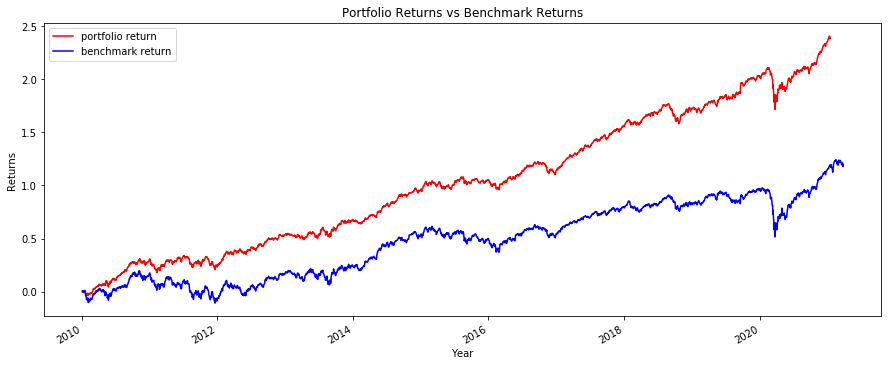

In [30]:
X=pd.DataFrame()
Y=pd.DataFrame()
X=port_ret.cumsum()
Y=benchmark_ret.cumsum()
X.plot(figsize = (15, 6),color= "red");
Y.plot(figsize = (15, 6),color="blue");
plt.xlabel("Year")
plt.ylabel("Returns")
plt.title("Portfolio Returns vs Benchmark Returns")
plt.legend(["portfolio return", "benchmark return"],loc ="upper left")
plt.show

In [31]:
riskfree_rate = 0.06
implied_mrket_return=0.0799
#Assuming risk free rate in india is equal to value of 10 year Government Bond yield 


In [32]:
sharpe_ratio = (portfolio_return - riskfree_rate)/ pfolio_vol
sharpe_ratio

1.1807933338082326